***
### Import required Libraries

In [1]:
from platform import python_version
print(" Python version used for this analysis is : ", python_version())

 Python version used for this analysis is :  3.9.13


In [2]:
# Data processing
import pandas as pd
import numpy as np

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Pattern matching and text manipulation
import re

# train-test split
from sklearn.model_selection import train_test_split

# calculating the confusion matrix and other matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# building and training deep learning models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import load_model

# for natural language processing tasks
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

# sets the display option to show all columns
pd.set_option("display.max_columns", None)

# for warning 
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tf.__version__

'2.12.0'

**UCI Sentiment Labeled Sentences Data Set(Amazon)** :  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/

In [4]:
# Read the data from the text file and set the header
path = r"C:\Users\Abhishek\Desktop\D213\Task 2\sentiment labelled sentences\amazon_cells_labelled.txt"

df_amazon = pd.read_csv(path, sep='\t', header=None)

# set the header 
df_amazon.columns = ['review', 'sentiment']

In [5]:
# display first 5 records
df_amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
#View the shape of the data
df_amazon.shape

(1000, 2)

In [7]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# check for null 
print("Check for Nulls")
print("-"*100)
print(df_amazon.isnull().any())

Check for Nulls
----------------------------------------------------------------------------------------------------
review       False
sentiment    False
dtype: bool


In [9]:
# check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_amazon.isna().any())

Check for Missing Values
----------------------------------------------------------------------------------------------------
review       False
sentiment    False
dtype: bool


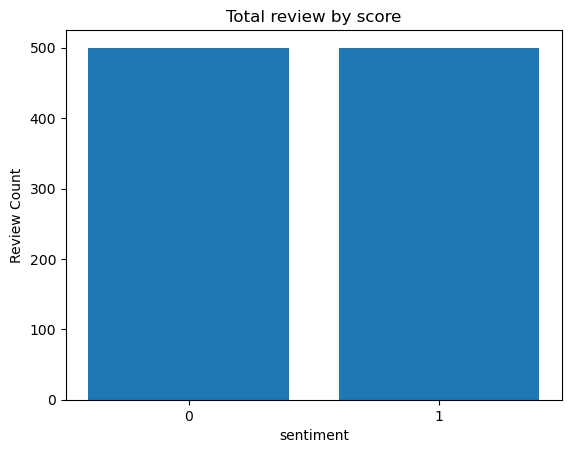

In [10]:
# Group the data by the binary label column
grouped_data = df_amazon.groupby('sentiment')

group_counts = grouped_data.size()

# Plotting the group distribution
plt.bar(group_counts.index, group_counts.values)
plt.xlabel('sentiment')
plt.ylabel('Review Count')
plt.title('Total review by score')
plt.xticks([0, 1])                               # Set the x-ticks to only show 0 and 1
plt.show()

**Result : Dataset has same number of positive and negative sentiments.** 

In [11]:
## Get the Independent Features
X=df_amazon.drop('sentiment',axis=1)
X.head()

,review
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.


In [12]:
## Get the Dependent features
y=df_amazon['sentiment']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [13]:
# display the shape of X and y
X.shape, y.shape

((1000, 1), (1000,))

### Remove the specal and unusual characters from the text column

In [14]:
# Function to remove special characters and convert to lowercase
def clean_text(text):
    # Remove special characters using regex
    #cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

In [15]:
# Apply the clean_text function to the 'review' column
X['review'] = X['review'].apply(lambda x: clean_text(x))

In [16]:
X.head()

,review
0,so there is no way for me to plug it in here i...
1,good case excellent value
2,great for the jawbone
3,tied to charger for conversations lasting more...
4,the mic is great


### Tokenization 

breaking text into individual tokens or units. 

In [17]:
# Tokenize the 'review' column
X['review'] = X['review'].apply(word_tokenize)

In [18]:
X.head()

,review
0,"[so, there, is, no, way, for, me, to, plug, it..."
1,"[good, case, excellent, value]"
2,"[great, for, the, jawbone]"
3,"[tied, to, charger, for, conversations, lastin..."
4,"[the, mic, is, great]"


### Remove the stopwords

Removing the stop words and excluding the negating words

In [19]:
# Remove most stop words
stop_words = set(stopwords.words('english'))  # Set the language to 'english'

In [20]:
# Define the negating words to keep
negating_words = ['not', 'no', 'never', 'none', 'neither', 'nor', 'cannot', "can't", "won't", "don't", 'but'
                  "doesn't", "isn't", "wasn't", "weren't", "hasn't", "haven't", "hadn't", "wouldn't", "shouldn't", "couldn't"
                ]

In [21]:
# Remove stop words excluding negating words
filtered_X = X['review'].apply(lambda tokens: [word for word in tokens if word not in stop_words or word in negating_words])

# Update the origional X review column with the filtered tokens
X['review'] = filtered_X

In [22]:
X['review']

0             [no, way, plug, us, unless, go, converter]
1                         [good, case, excellent, value]
2                                       [great, jawbone]
3      [tied, charger, conversations, lasting, minute...
4                                           [mic, great]
                             ...                        
995    [screen, get, smudged, easily, touches, ear, f...
996                    [piece, junk, lose, calls, phone]
997                          [item, not, match, picture]
998          [thing, disappoint, infra, red, port, irda]
999            [not, answer, calls, unit, never, worked]
Name: review, Length: 1000, dtype: object

### Vocabulary size

In [23]:
# copy
reviews = X['review']

# Combine all reviews into a single list
all_tokens = [token for review in reviews for token in review]

# Calculate the vocabulary size
vocabulary_size = len(set(all_tokens))

print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 1750


### Proposed word embedding length

**References** - https://medium.com/@b.terryjack/nlp-everything-about-word-embeddings-9ea21f51ccfe

In [24]:
# Calculate dataset size
dataset_size = len(X['review'])  # Number of samples in your dataset

# Calculate the proposed word embedding length
embedding_length = min(50, int(vocabulary_size ** 0.25 * dataset_size ** 0.25))

print("Embedding length:", embedding_length)

Embedding length: 36


### Maximum sequence length

In [25]:
# Calculate the maximum sequence length
line_num_words = [len(t_line) for t_line in X['review']]

max_sequence_length = max(line_num_words)

print("Maximum Sequence Length:", max_sequence_length)

Maximum Sequence Length: 16


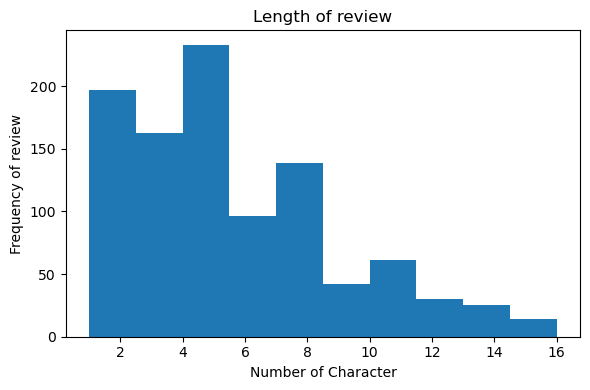

In [26]:
# Visualization 
plt.figure(figsize=(6, 4))
plt.hist(line_num_words)
plt.xlabel('Number of Character')
plt.ylabel('Frequency of review')
plt.title('Length of review')
plt.tight_layout()
plt.show()

#### Result - From this graph I can see that the max length of the review is around 16 character

### Vectorization 

In [27]:
# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X['review'])

# Convert the text data to sequences
sequences = tokenizer.texts_to_sequences(X['review'])
word_index = tokenizer.word_index

In [28]:
# display the sequence of some random index
sequences[0], sequences[189]

([24, 136, 86, 436, 437, 155, 685],
 [868, 128, 869, 870, 497, 871, 457, 331, 46, 872, 27, 371])

In [29]:
len(word_index)

1750

### Padding 

In [30]:
# Pad sequences to ensure consistent length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [31]:
padded_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 136,  86, 436,
       437, 155, 685])

In [32]:
padded_sequences[635]

array([   0,    0,    0,    0,    0,    0,   27, 1329,    4,    6,   42,
         36,  379,    2,   83,  642])

In [33]:
padded_sequences.shape

(1000, 16)

In [34]:
# store X and y values as array 
X_final = np.array(padded_sequences)
y_final = np.array(y)

In [35]:
X_final

array([[   0,    0,    0, ...,  437,  155,  685],
       [   0,    0,    0, ...,   19,   21,  182],
       [   0,    0,    0, ...,    0,    3,  314],
       ...,
       [   0,    0,    0, ...,    2,  346,  160],
       [   0,    0,    0, ...,  641, 1748, 1749],
       [   0,    0,    0, ...,  134,  119,   35]])

In [36]:
y_final

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [37]:
X_final.shape, y_final.shape

((1000, 16), (1000,))

### Splitting the data

In [38]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_final,y_final, test_size=0.2, random_state=42)

# Split the train data to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [39]:
X_train

array([[   0,    0,    0, ...,   21, 1617,    7],
       [   0,    0,    0, ...,   28,  567,  568],
       [   0,    0,    0, ..., 1033,  349,  105],
       ...,
       [   0,    0,    0, ...,   26,   59,   29],
       [   0,    0,    0, ...,   44,  531,  244],
       [   0,    0,    0, ...,  605,   16,    3]])

In [40]:
y_train

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [41]:
X_test

array([[   0,    0,    0, ...,  159,    4,   23],
       [   0,    0,    0, ...,   48, 1484,  664],
       [   0,    0,    0, ...,  100,   25,    5],
       ...,
       [   0,    0,    0, ...,    4,  896,  141],
       [   0,    0,    0, ...,  605, 1291,   23],
       [   0,    0,    0, ...,  478,  107,  328]])

In [42]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [43]:
X_val

array([[   0,    0,    0, ..., 1469,  106, 1470],
       [   0,    0,    0, ...,   24,  360,  813],
       [   0,    0,    0, ...,  456,  209,  262],
       ...,
       [   0,    0,    0, ...,  816,   27,  364],
       [   0,    0,    0, ...,  205,   67,  170],
       [   0,    0,    0, ...,   70,  585,  242]])

In [44]:
y_val

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0], dtype=int64)

In [45]:
X_train.shape

(600, 16)

In [46]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((600, 16), (200, 16), (200, 16), (600,), (200,), (200,))

### Cleaned Dataset  

In [47]:
# Extract the training data in CSV format 
pd.DataFrame(X_train).to_csv('X_train_Task2.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train_Task2.csv', index=False)

# Extract the validation data in CSV format 
pd.DataFrame(X_val).to_csv('X_val_Task2.csv', index=False)
pd.DataFrame(y_val).to_csv('y_val_Task2.csv', index=False)

# Extract the testing data in CSV format 
pd.DataFrame(X_test).to_csv('X_test_Task2.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test_Task2.csv', index=False)

### Creating the LSTM Model

In [48]:
len(word_index)

1750

In [49]:
embedding_length

36

In [50]:
max_sequence_length

16

In [51]:
# Instantiate a sequential model

embedding_dim = embedding_length

model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 36)            63036     
                                                                 
 lstm (LSTM)                 (None, 16, 128)           84480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 203,197
Trainable params: 203,197
Non-trai

### Train the LSTM model using the training data

In [54]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [55]:
num_epochs = 15
batch_size = 64
results = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/15
10/10 [==============================] - 6s 157ms/step - loss: 0.6932 - accuracy: 0.5167 - val_loss: 0.6921 - val_accuracy: 0.5200
Epoch 2/15
10/10 [==============================] - 0s 41ms/step - loss: 0.6906 - accuracy: 0.5700 - val_loss: 0.6893 - val_accuracy: 0.6150
Epoch 3/15
10/10 [==============================] - 0s 35ms/step - loss: 0.6796 - accuracy: 0.6533 - val_loss: 0.6761 - val_accuracy: 0.6250
Epoch 4/15
10/10 [==============================] - 0s 39ms/step - loss: 0.6128 - accuracy: 0.7917 - val_loss: 0.6142 - val_accuracy: 0.7200
Epoch 5/15
10/10 [==============================] - 0s 39ms/step - loss: 0.4178 - accuracy: 0.8500 - val_loss: 0.5635 - val_accuracy: 0.6750
Epoch 6/15
10/10 [==============================] - 0s 36ms/step - loss: 0.2974 - accuracy: 0.8767 - val_loss: 0.5768 - val_accuracy: 0.6600
Epoch 7/15
10/10 [==============================] - 0s 40ms/step - loss: 0.1901 - accuracy: 0.9333 - val_loss: 0.5344 - val_accuracy: 0.7650
Epoch 8/15
1

In [56]:
results.history

{'loss': [0.6932420134544373,
  0.6906256675720215,
  0.6795720458030701,
  0.6127599477767944,
  0.41776618361473083,
  0.2974136471748352,
  0.19006846845149994,
  0.08491211384534836,
  0.04854964092373848,
  0.02525251917541027,
  0.012444114312529564],
 'accuracy': [0.5166666507720947,
  0.5699999928474426,
  0.653333306312561,
  0.7916666865348816,
  0.8500000238418579,
  0.8766666650772095,
  0.9333333373069763,
  0.9800000190734863,
  0.9850000143051147,
  0.9933333396911621,
  0.996666669845581],
 'val_loss': [0.6921133995056152,
  0.6892898082733154,
  0.6761240363121033,
  0.6142022609710693,
  0.5635402202606201,
  0.5768404603004456,
  0.5344261527061462,
  0.6809774041175842,
  0.7883343696594238,
  0.8308792114257812,
  0.9628426432609558],
 'val_accuracy': [0.5199999809265137,
  0.6150000095367432,
  0.625,
  0.7200000286102295,
  0.675000011920929,
  0.6600000262260437,
  0.7649999856948853,
  0.7749999761581421,
  0.7149999737739563,
  0.7699999809265137,
  0.74500000

In [57]:
# predictive accuracy of the training data
train_accuracy = results.history['accuracy']
train_accuracy

[0.5166666507720947,
 0.5699999928474426,
 0.653333306312561,
 0.7916666865348816,
 0.8500000238418579,
 0.8766666650772095,
 0.9333333373069763,
 0.9800000190734863,
 0.9850000143051147,
 0.9933333396911621,
 0.996666669845581]

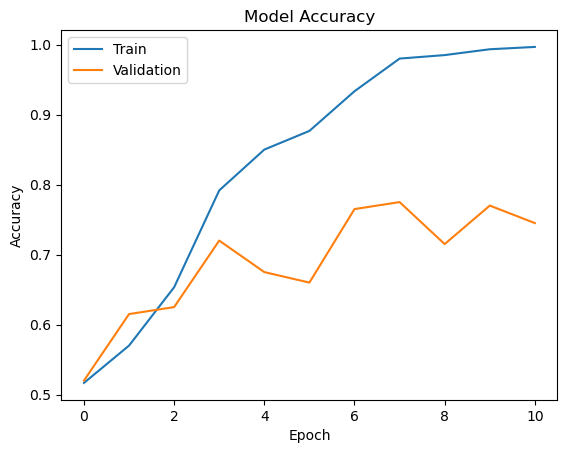

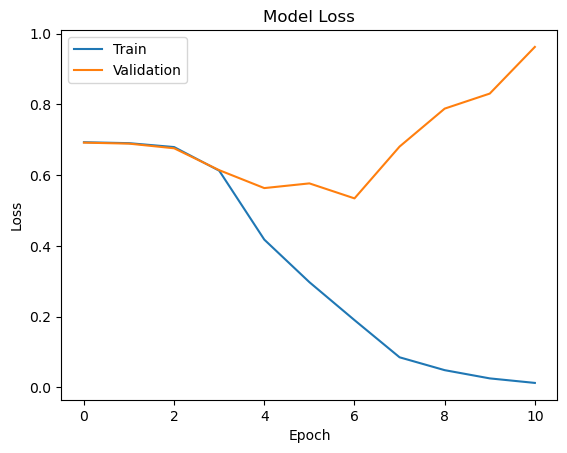

In [58]:
# Plot training and validation accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Save the model 

In [59]:
model.save("LSTM_sentiment_analysis_model.h5")

In [60]:
# load the model (just to check)
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("LSTM_sentiment_analysis_model.h5")

In [61]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 36)            63036     
                                                                 
 lstm (LSTM)                 (None, 16, 128)           84480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 203,197
Trainable params: 203,197
Non-trai

### Evaluating the Model

In [62]:
## Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

7/7 [==============================] - 0s 9ms/step - loss: 0.8533 - accuracy: 0.8100
Test Loss: 0.8533172011375427
Test Accuracy: 0.8100000023841858


**Result :** The test accuracy of 0.810 indicates that the trained model achieved an accuracy of approximately 81% on the test dataset.

### Confusion Matrix

In [63]:
# Calculate y prediction on unseen data 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

7/7 [==============================] - 1s 9ms/step


Confusion matrix

 [[83 10]
 [28 79]]

True Positives(TP) =  83

True Negatives(TN) =  79

False Positives(FP) =  10

False Negatives(FN) =  28


<AxesSubplot:>

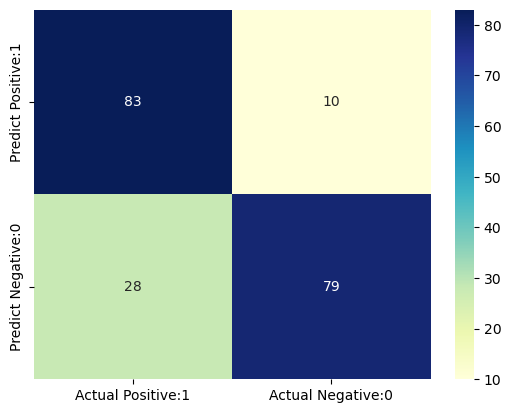

In [64]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Results :**

The model correctly predicted 79 instances as positive (True Positives) along with 80 instances as negative (True Negatives).
Also, the model incorrectly predicted 14 instances as positive when they were actually negative (False Positives) and 27 instances as negative when they were actually positive (False Negatives).


In [65]:
# calculate the evaluation metrics 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)

Precision: 0.8876404494382022
Recall: 0.7383177570093458
F1-score: 0.8061224489795918


### Prediction on new data

In [66]:
# Example prediction on new data
new_text = ['This product is amazing!']
new_text = [re.sub('[^a-zA-Z]', ' ', text) for text in new_text]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
prediction = model.predict(new_sequences)

# Convert the probability to a class label
predicted_sentiment = "Positive" if prediction > 0.5 else "Negative"

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 20ms/step
Predicted Sentiment: Positive


In [67]:
# Example prediction on new data
# new_text = ['not recomended rediculas!']
new_text = ['i am not happy with this procuct!']
new_text = [re.sub('[^a-zA-Z]', ' ', text) for text in new_text]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
prediction = model.predict(new_sequences)

# Convert the probability to a class label
predicted_sentiment = "Positive" if prediction > 0.5 else "Negative"

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 21ms/step
Predicted Sentiment: Negative


**Results:** Based on these results we can say that the model is correctly predicting customer sentiment. 

**References -** 

Parikh, A. B. (n.d.). Machine Learning & Deep Learning in Python & R.
https://wgu.udemy.com/course/data_science_a_to_z/learn/lecture/20811912#overview

WGU, R. (n.d.). D213 Sentiment Analysis I.
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a1e9802c-5808-4287-a7e5-aed601580d89

Resources, W. (n.d.). D213 T2 May 15 22.
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=cedbd86a-2543-4d9d-9b0e-aec4011a606d

Terry-Jack, M. (2019, Apr 21). NLP: Everything about Embeddings.
https://medium.com/@b.terryjack/nlp-everything-about-word-embeddings-9ea21f51ccfe
